<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import yfinance
import yfinance as yf


In [3]:
# Bitcoin prediction

In [4]:
# Bringing data from yfinance to dataframe - BITCOIN
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [5]:
# Bringing data into csv file
df.to_csv('bitcoin_data.csv', encoding='utf-8', index=True)

In [6]:
# Checking data in dataframe
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

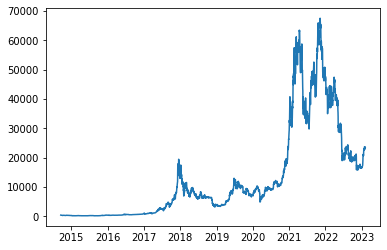

In [8]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [9]:
# length of dataframe
len(df)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [10]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [11]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train


[457.3340148925781,
 424.44000244140625,
 394.7959899902344,
 408.90399169921875,
 398.8210144042969,
 402.1520080566406,
 435.7909851074219,
 423.2049865722656,
 411.5740051269531,
 404.42498779296875,
 399.5199890136719,
 377.1809997558594,
 375.4670104980469,
 386.9440002441406,
 383.614990234375,
 375.0719909667969,
 359.5119934082031,
 328.8659973144531,
 320.510009765625,
 330.0790100097656,
 336.18701171875,
 352.94000244140625,
 365.0260009765625,
 361.56201171875,
 362.29901123046875,
 378.54901123046875,
 390.41400146484375,
 400.8699951171875,
 394.77301025390625,
 382.5559997558594,
 383.75799560546875,
 391.4419860839844,
 389.5459899902344,
 382.8450012207031,
 386.4750061035156,
 383.1579895019531,
 358.4169921875,
 358.3450012207031,
 347.27099609375,
 354.7040100097656,
 352.989013671875,
 357.6180114746094,
 335.59100341796875,
 345.30499267578125,
 338.3210144042969,
 325.7489929199219,
 325.8919982910156,
 327.5539855957031,
 330.49200439453125,
 339.4859924316406,


In [12]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[37575.1796875,
 39208.765625,
 36894.40625,
 35551.95703125,
 35862.37890625,
 33560.70703125,
 33472.6328125,
 37345.12109375,
 36702.59765625,
 37334.3984375,
 35552.515625,
 39097.859375,
 40218.4765625,
 40406.26953125,
 38347.0625,
 38053.50390625,
 35787.24609375,
 35615.87109375,
 35698.296875,
 31676.693359375,
 32505.66015625,
 33723.02734375,
 34662.4375,
 31637.779296875,
 32186.27734375,
 34649.64453125,
 34434.3359375,
 35867.77734375,
 35040.8359375,
 33572.1171875,
 33897.046875,
 34668.546875,
 35287.78125,
 33746.00390625,
 34235.1953125,
 33855.328125,
 32877.37109375,
 33798.01171875,
 33520.51953125,
 34240.1875,
 33155.84765625,
 32702.025390625,
 32822.34765625,
 31780.73046875,
 31421.5390625,
 31533.068359375,
 31796.810546875,
 30817.83203125,
 29807.34765625,
 32110.693359375,
 32313.10546875,
 33581.55078125,
 34292.4453125,
 35350.1875,
 37337.53515625,
 39406.94140625,
 39995.90625,
 40008.421875,
 42235.546875,
 41626.1953125,
 39974.89453125,
 39201.9453

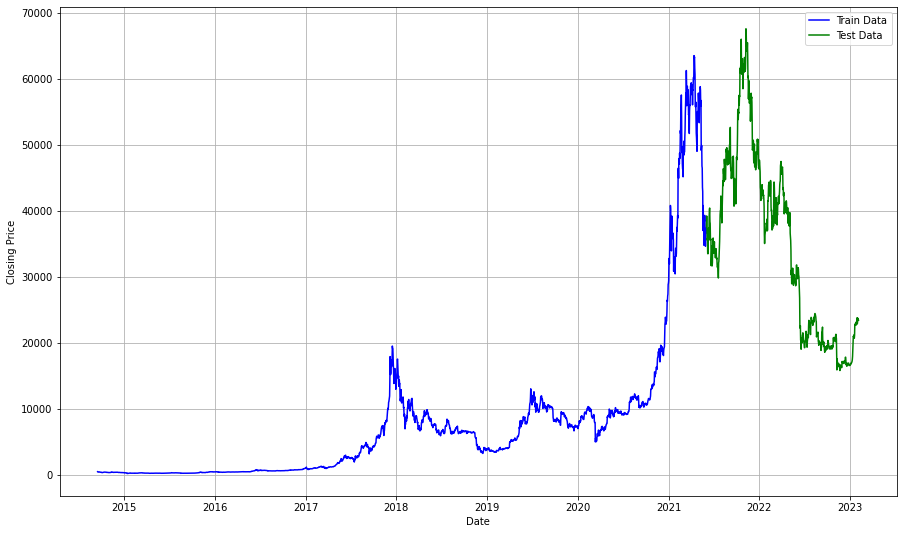

In [13]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [14]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [15]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [16]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3061
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -24772.671
Method:                       css-mle   S.D. of innovations            791.603
Date:                Sat, 04 Feb 2023   AIC                          49557.342
Time:                        16:20:31   BIC                          49593.501
Sample:                             1   HQIC                         49570.335
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5113     14.764      0.509      0.611     -21.425      36.448
ar.L1.D.y     -0.0251      0.018     -1.389      0.165      -0.060       0.010
ar.L2.D.y      0.0045      0.018      0.249      0.8

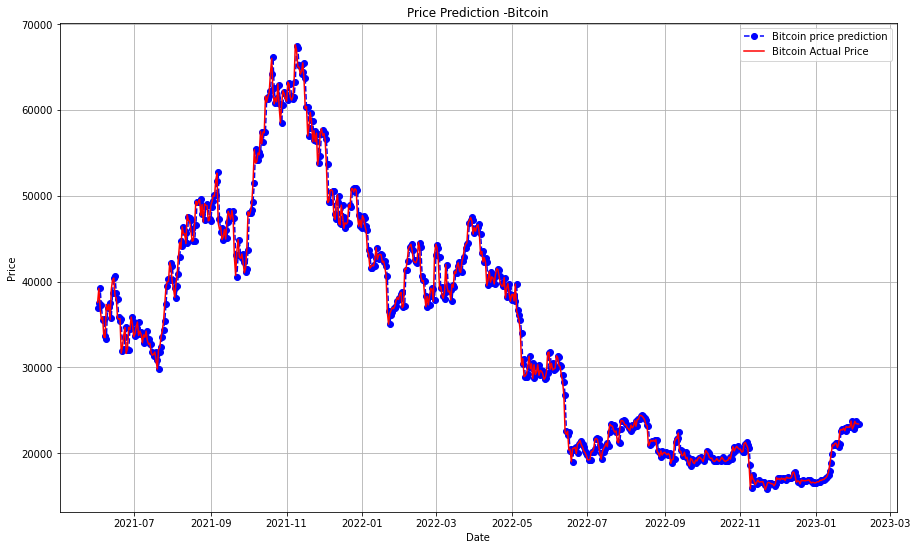

In [17]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='Bitcoin price prediction')
plt.plot(start_date, test, color ='red', label ='Bitcoin Actual Price')
plt.title('Price Prediction -Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.024342209647853323


MAPE of 2.4% implies the model is 97.2% accurate in predicting the test obeservations

In [19]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 34350.28569152732
Mean Squared Error: 1282.0337467155855


In [20]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 23437.326220103456
Prediction 37216.81373408806
Prediction 39263.39956490572
Prediction 37167.08991395449
Prediction 36121.25341051837


In [21]:
# Converting list to dataframe 
Prediction = pd.DataFrame(prediction_next_5_days)

In [22]:
#Reviewing dataframe
Prediction

,0
0,23437.326220
1,37216.813734
2,39263.399565
3,37167.089914
4,36121.253411


In [23]:
#Converting dataframe to csv for visualization
Prediction.to_csv('Bitcoin_prediction.csv', header='Prediction', index=True)